## 02. infinite potential well

### Laplacian operator
* Laplacian operator($\nabla^2$) in 3D
  - In the catesian coordinate, it is given by
    $$\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2} $$
* Laplacian operator($\nabla^2$) in 1D
  - In this case, it is reduced to
    $$\nabla^2=\frac{d^2}{dx^2} $$
  - It is simply the second order diferentiation

### Where can we find it?
* The infinte potential well problem
  $$\frac{d^2\psi(x)}{dx^2}=-k^2\psi(x) $$
  - Therefore, solving the schrodinger equation is just to calcuate the eigenvalue/eigenfunction of the Laplacian operator
  - Analytic solutions(coskx and sinkx) are known.
  - Our goal is $\textcolor{red}{its\ discretization }$

### Discretization
* Let us assume that we have N points in [0, a]
    - when they are uniformly distributed, the i-th point is given by
      $$Matlab, \quad x_i=\frac{i-1}{N-1}a=(i-1)\Delta x $$
      $$Python, \quad x_i=\frac{i}{N-1}a=i\Delta x $$
    - Then, the wavefunction, $\psi(x)$, can be described with a vector of $[\psi_2\ \psi_3\ \cdots \psi_{N-2}\ \psi_{N-1}]^T $
    - Of course, $\psi_i =\psi(x_i)$ and the boundary conditions are imposed.
    - In such a case, the second derivative can be approximated by
      $$\left. \frac{d^2 \psi}{dx^2} \right|_{x=x_i}\simeq\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2} $$

### Matrix form
* Consider a case of N=5
    - Then, $\psi(x)$, can be described with a small vector of $[\psi_2\ \psi_3\ \psi_4]^T $
    - The Laplacian operator maps the above vector into
$$\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
\psi_2\\ \psi_3\\ \psi_4
\end{bmatrix}
$$
    - It can be regarded as a discretized version of $$\frac{d^2\psi(x)}{dx^2} $$

### Eigenvalue problem
* Assume a natural number, $N(\ge 2) $
    - For a square matrix, A, whose size is N x N, an eigenvalue $(\lambda)$ and the corresponding eigenvector (x) satisfy
      $$A\vec{x}=\lambda \vec{x} $$
    - Example)
      $$A=
      \begin{bmatrix}
      -2 & 1 \\
      -1 & 2
      \end{bmatrix}
      $$
    it is found that $\lambda=3$ or $\lambda=1$. Also corresponding eigenvectors are $[1\ -1]^T$ and $[1\ 1]^T$, respectively

### Infinite potential well(N=5)
* Recall that the problem looks like:
  $$\frac{d^2 \psi}{dx^2}=-k^2\psi$$
* In a matrix form(with the boundary conditions),
    - It is simply given by
$$\frac{1}{(\Delta x)^2}
\begin{bmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
\psi_2\\ \psi_3\\ \psi_4
\end{bmatrix}
=-k^2
\begin{bmatrix}
\psi_2\\ \psi_3\\ \psi_4
\end{bmatrix}
$$
    where $\Delta x=\frac{a}{4}$
    - How can we solve it numerically?
  
### Problem
* Write a simple code for solving the infinite potential well problem
* In this case, the effective mass is $0.19m_0$.
* Use three different values of N.(5,50,500)

#### 포텐셜 우물과 포아송방정식의 수치해석의 가장 큰 차이?
#### 포텐셜 우물: 2계미분을 고유값으로 푼다. Ax=$\lambda$x, 경계값(0,a)=0
#### 포아송 방정식: 2계미분을 연립방정식으로 푼다. Ax=b, 경계값(0,0)=1, (N,N)=1이 되어 2계미분 이산화 행렬식이 다르게 된다.

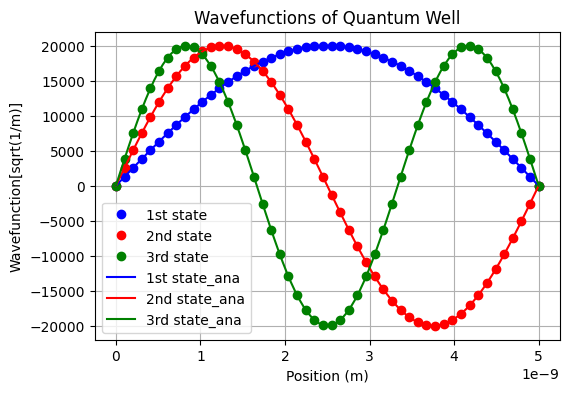

En_num1:0.079eV, En_num2:0.316eV, En_num3:0.710eV
En_ana1:0.079eV, En_ana2:0.317eV, En_ana3:0.712eV


In [18]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

a=5*1e-9
N=50
N1=N-2
dx=a/(N-1)
A=np.zeros((N1,N1))
for i in range(N1):
    if i==0 :
        A[i,i  ]=-2; A[i,i+1]= 1
    elif i==N1-1: 
        A[i,i-1]= 1; A[i,i  ]=-2
    else : 
        A[i,i-1]= 1; A[i,i  ]=-2; A[i,i+1]=1

E, psi=eigh(-hbar**2/(2*m*q)*A/dx**2)
#print(E)

x=np.linspace(0,a,N)
wavefunctions = np.zeros((N, psi.shape[1]))
wavefunctions[1:-1, :] = psi
#print(wavefunctions)

# Numerical wavefunction normalization processing
for n in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)
    wavefunctions[:, n] /= norm

##########################
### Numerical solution ###
##########################

plt.figure(figsize=(6,4))
plt.plot(x, wavefunctions[:, 0], 'bo', label='1st state')
plt.plot(x, wavefunctions[:, 1], 'ro', label='2nd state')
plt.plot(x, -wavefunctions[:, 2], 'go', label='3rd state')

###########################
### Analytical solution ###
###########################

x_ana = np.linspace(0, a, 100)
psi_ana1= np.sqrt(2 / a) * np.sin(1 * x_ana* np.pi / a)
psi_ana2= np.sqrt(2 / a) * np.sin(2 * x_ana* np.pi / a)
psi_ana3= np.sqrt(2 / a) * np.sin(3 * x_ana* np.pi / a)

plt.plot(x_ana, psi_ana1, 'b', label='1st state_ana')
plt.plot(x_ana, psi_ana2, 'r', label='2nd state_ana')
plt.plot(x_ana, psi_ana3, 'g', label='3rd state_ana')

plt.xlabel('Position (m)'), plt.ylabel('Wavefunction[sqrt(1/m)]'), plt.title('Wavefunctions of Quantum Well')
plt.legend(), plt.grid()
plt.show()

print(f"En_num1:{E[0]:0.3f}eV, En_num2:{E[1]:0.3f}eV, En_num3:{E[2]:0.3f}eV")
En_ana1=hbar**2/(2*m*q)*(1*np.pi/a)**2
En_ana2=hbar**2/(2*m*q)*(2*np.pi/a)**2
En_ana3=hbar**2/(2*m*q)*(3*np.pi/a)**2
print(f"En_ana1:{En_ana1:.3f}eV, En_ana2:{En_ana2:.3f}eV, En_ana3:{En_ana3:.3f}eV")

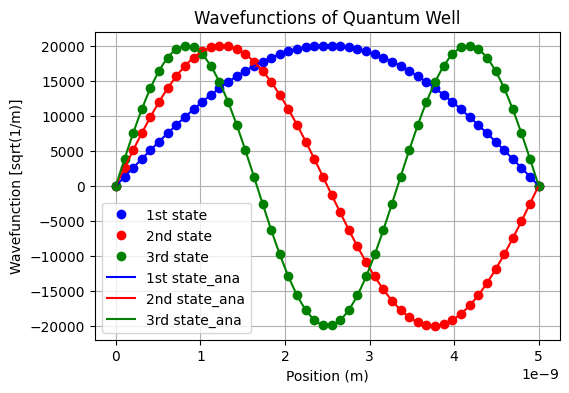

En_num1: 0.079 eV, En_num2: 0.316 eV, En_num3: 0.710 eV
En_ana1: 0.079 eV, En_ana2: 0.317 eV, En_ana3: 0.712 eV


In [43]:
from constant import q, m0, kB, k, epsilon_si, epsilon_ox, epsilon0, nint, T, kT, h, hbar, m
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def build_Hamiltonian(N, dx):
    """Discretized Hamiltonian matrix using finite difference method"""
    N1 = N - 2  # 내부 노드 수
    A = np.zeros((N1, N1))
    for i in range(N1):
        if i == 0:
            A[i, i] = -2; A[i, i + 1] = 1
        elif i == N1 - 1:
            A[i, i - 1] = 1; A[i, i] = -2
        else:
            A[i, i - 1] = 1; A[i, i] = -2; A[i, i + 1] = 1
    H = -hbar**2 / (2 * m * q) * A / dx**2
    return H

a = 5e-9
N = 50
dx = a / (N - 1)
x = np.linspace(0, a, N)

# Hamiltonian 만들기
H = build_Hamiltonian(N, dx)

# Eigenvalue, Eigenvector 계산
E, psi = eigh(H)

# 전체 wavefunction 배열 만들기
wavefunctions = np.zeros((N, psi.shape[1]))
wavefunctions[1:-1, :] = psi

# 정규화
for n in range(wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(wavefunctions[:, n]**2) * dx)
    wavefunctions[:, n] /= norm

# 수치 해석 결과 그리기
plt.figure(figsize=(6, 4))
plt.plot(x, wavefunctions[:, 0], 'bo', label='1st state')
plt.plot(x, wavefunctions[:, 1], 'ro', label='2nd state')
plt.plot(x, -wavefunctions[:, 2], 'go', label='3rd state')

# 해석 해 결과 그리기
x_ana = np.linspace(0, a, 100)
psi_ana1 = np.sqrt(2 / a) * np.sin(1 * np.pi * x_ana / a)
psi_ana2 = np.sqrt(2 / a) * np.sin(2 * np.pi * x_ana / a)
psi_ana3 = np.sqrt(2 / a) * np.sin(3 * np.pi * x_ana / a)

plt.plot(x_ana, psi_ana1, 'b', label='1st state_ana')
plt.plot(x_ana, psi_ana2, 'r', label='2nd state_ana')
plt.plot(x_ana, psi_ana3, 'g', label='3rd state_ana')

plt.xlabel('Position (m)')
plt.ylabel('Wavefunction [sqrt(1/m)]')
plt.title('Wavefunctions of Quantum Well')
plt.legend()
plt.grid()
plt.show()

# 에너지 출력
print(f"En_num1: {E[0]:.3f} eV, En_num2: {E[1]:.3f} eV, En_num3: {E[2]:.3f} eV")

En_ana1 = hbar**2 / (2 * m * q) * (1 * np.pi / a)**2
En_ana2 = hbar**2 / (2 * m * q) * (2 * np.pi / a)**2
En_ana3 = hbar**2 / (2 * m * q) * (3 * np.pi / a)**2
print(f"En_ana1: {En_ana1:.3f} eV, En_ana2: {En_ana2:.3f} eV, En_ana3: {En_ana3:.3f} eV")


In [7]:
from scipy.linalg import *
from numpy import array

A = array([[2, 1, 3],[1, 1, 1],[1, 2, 1]])
b = array([1, 2, 3])

x = solve(A, b)

print(x)

[ 3.  1. -2.]


In [8]:
from constant import q,m0,kB,k,epsilon_si,epsilon_ox,epsilon0,nint,T,kT,h,hbar,m
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh

N=5
A = np.zeros((N, N))
print(A)
np.fill_diagonal(A, -2)
print(A)
for i in range(N-1):
    A[i, i + 1] = 1
    A[i + 1, i] = 1

print(A)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[-2.  0.  0.  0.  0.]
 [ 0. -2.  0.  0.  0.]
 [ 0.  0. -2.  0.  0.]
 [ 0.  0.  0. -2.  0.]
 [ 0.  0.  0.  0. -2.]]
[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


In [ ]:
A = np.zeros((5, 5))
np.fill_diagonal(A, -2)
for i in range(N_inner - 1):
    A[i, i + 1] = 1
    A[i + 1, i] = 1
#print(A)

In [9]:
#바로 파이썬의 내장 함수인 enumerate()를 이용하면 되는데요. for 문의 in 뒷 부분을 enumerate() 함수로 한 번 감싸주기만 하면 됩니다.
for entry in enumerate(['A', 'B', 'C']): 
    print(entry)
    #enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줍니다. 
    #따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 합니다.

(0, 'A')
(1, 'B')
(2, 'C')


In [29]:
#N=["a","b","c","d","e"]
#for i in enumerate(N): 
#    print(i)

A = np.zeros(5)
print(A)
for i in enumerate(A): 
    print(i)

[0. 0. 0. 0. 0.]
(0, np.float64(0.0))
(1, np.float64(0.0))
(2, np.float64(0.0))
(3, np.float64(0.0))
(4, np.float64(0.0))


In [32]:

A = np.linspace(1,6,5)
print(A)
for i in enumerate(A): 
    print(i)

[1.   2.25 3.5  4.75 6.  ]
(0, np.float64(1.0))
(1, np.float64(2.25))
(2, np.float64(3.5))
(3, np.float64(4.75))
(4, np.float64(6.0))


[[  1.    0.    0.    0.    0. ]
 [ 11.7 -23.4  11.7   0.    0. ]
 [  0.   11.7 -15.6   3.9   0. ]
 [  0.    0.    3.9  -7.8   3.9]
 [  0.    0.    0.    0.    1. ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]
[[1.13869028e-16]
 [1.25000000e-01]
 [2.50000000e-01]
 [6.25000000e-01]
 [1.00000000e+00]]
Index 0: Value 1.1386902816668274e-16
Index 1: Value 0.12500000000000008
Index 2: Value 0.25000000000000006
Index 3: Value 0.625
Index 4: Value 1.0


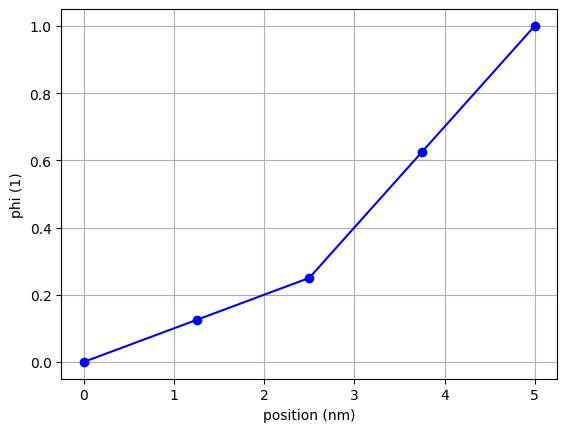

In [44]:
import numpy as np
import matplotlib.pyplot as plt

a, e1, e2= 5, 11.7, 3.9 # 왜 N이 홀수면 이상해 지는가?
N=4
dx=a/N
x=np.arange(N+1)*dx # 이때 N=0~10번째 자리까지
A=np.zeros((N+1,N+1))
b=np.zeros((N+1,1))


for ii in range(1,N): # 이때 N=1~9번째 자리까지이다. 따라서 초기값 [0,0],[N,N]을 넣어주어야 한다.
    A[0,0]=1 
    b[0]=0
    if dx*ii<a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e1, -2*e1,  e1
    elif dx*ii==a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e1, -e2-e1, e2
    elif dx*ii>a/2:
        A[ii,ii-1], A[ii,ii  ], A[ii,ii+1]= e2, -2*e2,  e2
    A[N,N]=1
    b[N]=1 #potenital=1

print(A)
print(b)

phi=np.linalg.solve(A,b)
print(phi)
for idx, value in enumerate(phi):
    print(f"Index {idx}: Value {value[0]}")

plt.plot(x,phi,'bo-')
plt.xlabel('position (nm)')
plt.ylabel('phi (1)')
plt.grid()
plt.show()


In [78]:
N=5
x=np.arange(N)
print(x)
x=np.arange(0,N,1)
print(x)
x=np.arange(1,N)
print(x)
x=np.arange(2,N)
print(x)

for i in range(0,N):
    y=[i]
    print("y1=",y)
for i in range(1,N):
    y=[i]
    print("y2=",y)
for i in range(2,N):
    y=[i]
    print("y3=",y)
z=np.zeros(N)
print(z)
z=np.zeros(N+1)
print(z)
x=np.linspace(0,4,N)
print(x)

[0 1 2 3 4]
[0 1 2 3 4]
[1 2 3 4]
[2 3 4]
y1= [0]
y1= [1]
y1= [2]
y1= [3]
y1= [4]
y2= [1]
y2= [2]
y2= [3]
y2= [4]
y3= [2]
y3= [3]
y3= [4]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 1. 2. 3. 4.]


In [73]:
a=1
N=5
dx=a/N
print(dx)
x=np.arange(N+1)*dx
print(x)

0.2
[0.  0.2 0.4 0.6 0.8 1. ]


In [86]:
import numpy as np
N=4 # N=50에서, 처음과 마지막은 제외
A=np.zeros((N,N)) # 0행렬
print(A)
diagonal=np.fill_diagonal(A,-2) #대각 -2
print(diagonal)
for ii in range(0,N-1): # ii가 0에서 N-2까지 변하면서(range 명령은 N-1미만 )
    A[ii,ii+1]=1 #대각에서 오른쪽 한칸 이동한 성분을 1로 만든다.
    A[ii+1,ii]=1 #대각에서 왼쪽 한칸 이동한 성분을 1로 만든다.
D,V=np.linalg.eig(A)
print(A)
print(D)
print(V)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
None
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
[-3.61803399 -2.61803399 -0.38196601 -1.38196601]
[[ 0.37174803  0.60150096 -0.37174803 -0.60150096]
 [-0.60150096 -0.37174803 -0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.60150096  0.37174803]
 [-0.37174803  0.60150096 -0.37174803  0.60150096]]


In [75]:
print(A)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


In [89]:
x=("a","b","c","d")
t=np.array(x)
print(t)

['a' 'b' 'c' 'd']


In [93]:
x=[4,5,3,6]
t=np.arange(x-1)
print(t)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [94]:
import numpy as np

x = np.array([4, 5, 3, 6])
x - 1    # ✅ 가능! → [3 4 2 5]


array([3, 4, 2, 5])

[[  1.    0.    0.    0.    0. ]
 [ 11.7 -23.4  11.7   0.    0. ]
 [  0.   11.7 -15.6   3.9   0. ]
 [  0.    0.    3.9  -7.8   3.9]
 [  0.    0.    0.    0.    1. ]]


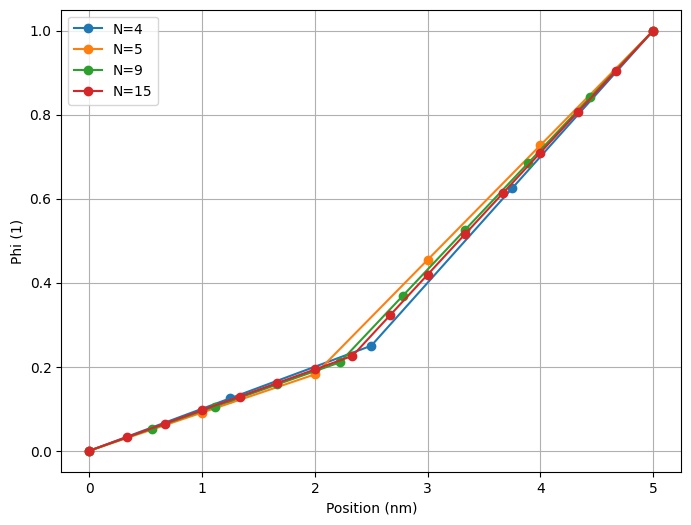

In [66]:
import numpy as np
import matplotlib.pyplot as plt

a, e1, e2 = 5, 11.7, 3.9

def set_matrix(N, dx):
    """행렬 A와 벡터 b를 설정하는 함수"""
    A = np.zeros((N+1, N+1))
    b = np.zeros((N+1, 1))

    A[0, 0] = 1
    b[0] = 0

    middle_index = int((a/2) / dx)  # 항상 같은 위치에서 전환하도록

    for ii in range(1, N):
        if ii == middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -e1 - e2, e2
        elif ii < middle_index:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e1, -2 * e1, e1
        else:
            A[ii, ii-1], A[ii, ii], A[ii, ii+1] = e2, -2 * e2, e2

    A[N, N] = 1
    b[N] = 1

    return A, b

def solve_potential(N):
    dx = a / N
    x = np.linspace(0, a, N+1)
    A, b = set_matrix(N, dx)
    phi = np.linalg.solve(A, b)
    return x, phi

N_values = [4,5,9,15]
print(A)
plt.figure(figsize=(8, 6))

for N in N_values:
    x, phi = solve_potential(N)
    plt.plot(x, phi, "o-", label=f"N={N}")

plt.xlabel('Position (nm)')
plt.ylabel('Phi (1)')
plt.grid()
plt.legend()
plt.show()


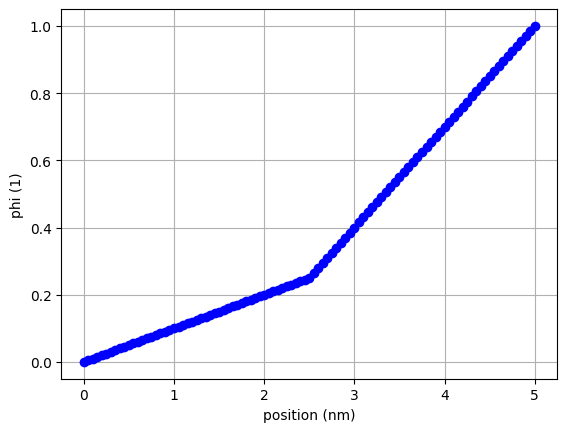

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def build_matrix(N, a, e1, e2):
    dx = a / (N - 1)
    A = np.zeros((N, N))
    b = np.zeros((N, 1))
    x = np.arange(N) * dx

    # 중간 경계 인덱스 계산
    mid_index = int((a / 2) / dx)

    for ii in range(1, N - 1):
        if ii < mid_index:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e1, -2 * e1, e1
        elif ii == mid_index:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e1, -e1 - e2, e2
        else:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e2, -2 * e2, e2

    # 경계 조건
    A[0, 0] = 1
    b[0] = 0
    A[N - 1, N - 1] = 1
    b[N - 1] = 1

    return A, b, x

def solve_potential(N=10, a=5, e1=11.7, e2=3.9):
    A, b, x = build_matrix(N, a, e1, e2)
    phi = np.linalg.solve(A, b)
    return x, phi

def plot_phi(x, phi):
    plt.plot(x, phi, 'bo-')
    plt.xlabel('position (nm)')
    plt.ylabel('phi (1)')
    plt.grid()
    plt.show()
'''
def print_phi(phi):
    for idx, value in enumerate(phi):
        print(f"Index {idx}: Value {value[0]}")


# 실행
if __name__ == "__main__":
    x, phi = solve_potential(N=101)  # N을 짝수로도 실행 가능
    #print_phi(phi)
    plot_phi(x, phi)
'''
x, phi = solve_potential(N=101)  # 100이 넘어가면 N 짝수/홀수가 관계없음.
plot_phi(x, phi)

[[  1.    0.    0.    0.    0. ]
 [ 11.7 -23.4  11.7   0.    0. ]
 [  0.   11.7 -15.6   3.9   0. ]
 [  0.    0.    3.9  -7.8   3.9]
 [  0.    0.    0.    0.    1. ]]


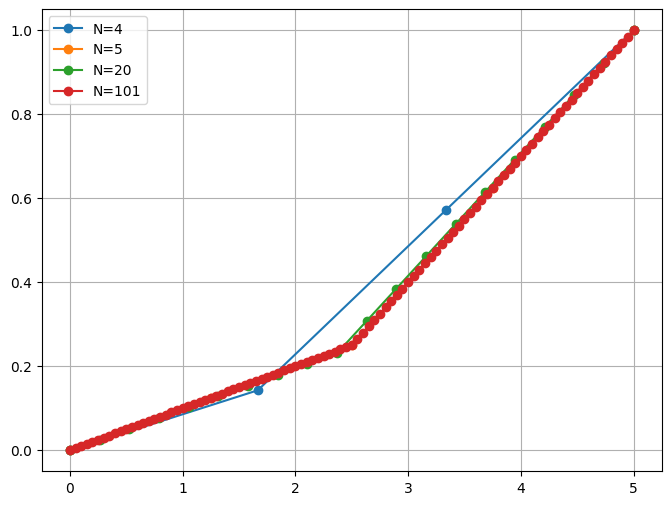

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def build_matrix(N, a, e1, e2):
    dx = a / (N - 1)
    A = np.zeros((N, N))
    b = np.zeros((N, 1))
    x = np.arange(N) * dx

    # 중간 경계 인덱스 계산
    mid_index = int((a / 2) / dx)

    for ii in range(1, N - 1):
        if ii < mid_index:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e1, -2 * e1, e1
        elif ii == mid_index:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e1, -e1 - e2, e2
        else:
            A[ii, ii - 1], A[ii, ii], A[ii, ii + 1] = e2, -2 * e2, e2

    # 경계 조건
    A[0, 0] = 1
    b[0] = 0
    A[N - 1, N - 1] = 1
    b[N - 1] = 1

    return A, b, x

def solve_potential(N=10, a=5, e1=11.7, e2=3.9):
    A, b, x = build_matrix(N, a, e1, e2)
    phi = np.linalg.solve(A, b)
    return x, phi

def plot_phi(x, phi):
    plt.plot(x, phi, 'bo-')
    plt.xlabel('position (nm)')
    plt.ylabel('phi (1)')
    plt.grid()
    plt.show()
'''
def print_phi(phi):
    for idx, value in enumerate(phi):
        print(f"Index {idx}: Value {value[0]}")
'''
N_values = [4,5,20,101]
print(A)
plt.figure(figsize=(8, 6))

for N in N_values:
    x, phi = solve_potential(N)
    plt.plot(x, phi, "o-", label=f"N={N}")

plt.grid(True), plt.legend()
plt.show()